## Actividad 3.2

- Fernando Guadarrama				A01379340
- Camila Trujillo					A01737170
- Mauricio Goris					A01736428
- Bernardo Quintana 	            A01658064

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special 
from scipy.optimize import curve_fit 
import seaborn as sns 
from sklearn.metrics import r2_score

## Agregar archivo

In [4]:
#Cargamos los datos
data = pd.read_csv('DataAnalytics.csv')

## Nulos y outliers

In [5]:
valores_nulos = data.isnull().sum()
print(valores_nulos)

Administrador              0
Usuario                    0
botón correcto           762
tiempo de interacción    762
mini juego               156
número de interacción    762
color presionado         762
dificultad                 0
fecha                      0
Juego                      0
auto push                762
tiempo de lección        177
tiempo de sesión         606
dtype: int64


In [6]:
numericas = data.select_dtypes(include=['int64', 'float64'])
cualitativas = data.select_dtypes(include=['object'])

numericas_generales = numericas.drop(['tiempo de sesión', 'tiempo de lección'], axis=1)
numericas_generales_sin_nulos = numericas_generales.fillna(numericas_generales.mean())

In [7]:
tiempo_sesion = numericas['tiempo de sesión']
tiempo_leccion = numericas['tiempo de lección']

media_sesion_sin_ceros = tiempo_sesion.mean()
media_leccion_sin_ceros = tiempo_leccion.mean()

tiempo_sesion_sin_nulos = tiempo_sesion.fillna(media_sesion_sin_ceros)
tiempo_leccion_sin_nulos = tiempo_leccion.fillna(media_leccion_sin_ceros)

In [8]:
numericas_con0 = pd.concat([tiempo_sesion_sin_nulos, tiempo_leccion_sin_nulos], axis=1)

<Figure size 1500x1000 with 0 Axes>

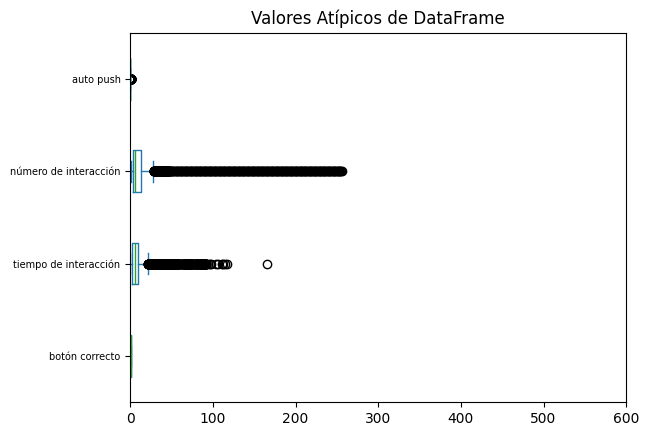

In [9]:
fig = plt.figure(figsize = (15,10))
numericas_generales_sin_nulos.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [10]:
y=numericas_generales_sin_nulos

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido botón correcto            2.50000
tiempo de interacción    21.81771
número de interacción    28.84852
auto push                 0.00000
dtype: float64
Limite inferior permitido botón correcto           -1.500000
tiempo de interacción    -9.731186
número de interacción   -12.509112
auto push                 0.000000
dtype: float64


In [11]:
data2_iqr= numericas_generales_sin_nulos[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data2_iqr.head(5)

,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0


In [12]:
valores_nulos2=data2_iqr.isnull().sum()
valores_nulos2

botón correcto             0
tiempo de interacción    669
número de interacción    371
auto push                816
dtype: int64

In [13]:
data3_iqr=data2_iqr.copy()
data3_iqr=data2_iqr.fillna(round(data2_iqr.mean(),1))
data3_iqr.head(10)

,botón correcto,tiempo de interacción,número de interacción,auto push
0,1.0,5.399169,1.0,0.0
1,0.0,1.283400,2.0,0.0
2,1.0,2.700226,3.0,0.0
3,0.0,3.050262,4.0,0.0
4,0.0,4.750256,5.0,0.0
5,0.0,7.400463,6.0,0.0
6,0.0,13.167350,7.0,0.0
7,1.0,5.900000,8.0,0.0
8,0.0,14.517180,9.0,0.0
9,0.0,15.617350,10.0,0.0


<Figure size 1500x1000 with 0 Axes>

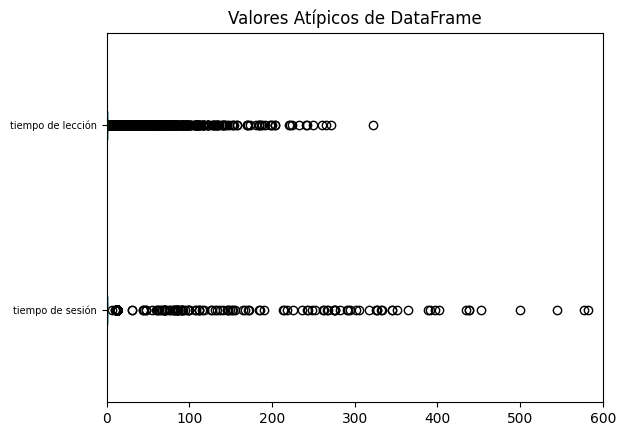

In [14]:
fig = plt.figure(figsize = (15,10))
numericas_con0.plot(kind='box', vert=False)
plt.xlim([0, 600])
plt.title('Valores Atípicos de DataFrame')
plt.yticks(fontsize=7, rotation=0)
plt.show()

In [15]:
y = numericas_con0

percentile1 = y.quantile(0.01) 
percentile99 = y.quantile(0.99)  

print("Límite superior permitido: ", percentile99)
print("Límite inferior permitido: ", percentile1)

Límite superior permitido:  tiempo de sesión     296.973188
tiempo de lección    118.946856
Name: 0.99, dtype: float64
Límite inferior permitido:  tiempo de sesión     0.0
tiempo de lección    0.0
Name: 0.01, dtype: float64


In [16]:
data4_iqr = numericas_con0[(y<=percentile99)&(y>=percentile1)]
data4_iqr.head(5)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [17]:
valores_nulos3=data4_iqr.isnull().sum()
valores_nulos3

tiempo de sesión     59
tiempo de lección    59
dtype: int64

In [18]:
data5_iqr=data4_iqr.copy()
data5_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr.head(10)

,tiempo de sesión,tiempo de lección
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [19]:
valores_nulos4=data5_iqr.isnull().sum()
valores_nulos4

tiempo de sesión     0
tiempo de lección    0
dtype: int64

In [20]:
data_final = pd.concat([cualitativas.fillna("Sin Dato"), data3_iqr, data5_iqr], axis=1)

In [21]:
valores_nulos5=data_final.isnull().sum()
valores_nulos5

Administrador            0
Usuario                  0
mini juego               0
color presionado         0
dificultad               0
fecha                    0
Juego                    0
botón correcto           0
tiempo de interacción    0
número de interacción    0
auto push                0
tiempo de sesión         0
tiempo de lección        0
dtype: int64

## Convertir variables categóricas ordinales

In [22]:
cat1 = data_final.groupby(['Administrador'])['Administrador'].count().sort_values(ascending=False)
cat1


Administrador
ALEIDA            3260
nicolas            440
LEONARDO           371
DENISSE            302
SERGIO ANGEL       243
CARLOS ENRIQUE     228
YAEL DAVID         224
AUSTIN             199
VALENTIN           163
erick              158
IKER BENJAMIN      128
KYTZIA              98
BENJAMIN            51
Name: Administrador, dtype: int64

In [23]:
data_final.Administrador = data_final.Administrador.replace({'ALEIDA':'1'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'nicolas':'2'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'LEONARDO':'3'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'DENISSE':'4'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'SERGIO ANGEL':'5'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'CARLOS ENRIQUE':'6'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'YAEL DAVID':'7'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'AUSTIN':'8'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'VALENTIN':'9'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'erick':'10'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'IKER BENJAMIN':'11'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'KYTZIA':'12'}, regex=False)
data_final.Administrador = data_final.Administrador.replace({'BENJAMIN':'13'}, regex=False)

In [24]:
cat2 = data_final.groupby(['Usuario'])['Usuario'].count().sort_values(ascending=False)
cat2

Usuario
LEONARDO              546
ALEIDA                487
nicolas               440
JOSE JAVIER           394
LEONARDO              371
JESUS ALEJANDRO       356
ramiro isai           332
ADRIAN                280
SERGIO ANGEL          243
CARLOS ENRIQUE        228
DENISSE               228
YAEL DAVID            224
VALENTIN              163
erick                 158
IKER BENJAMIN         152
NICOLAS |             128
ERICK OSVALDO         126
CONCEPCION            103
KYTZIA                 98
AUSTIN                 96
JOSE IGNACIO TADEO     94
JOSE IAN               86
ASHLEY                 75
JOSHUA                 74
YEREMI YAZMIN          71
MA DEL ROSARIO         64
BENJAMIN               51
INGRID                 49
RENE                   44
CARLOS ABEL            39
ARLETT                 29
ESMERALDA              24
IRVING                 10
jesus eduardo           2
Name: Usuario, dtype: int64

In [25]:
data_final.Usuario = data_final.Usuario.replace({'LEONARDO':'1'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ALEIDA':'2'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'nicolas':'3'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE JAVIER ':'4'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'LEONARDO ':'5'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JESUS ALEJANDRO':'6'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ramiro isai':'7'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ADRIAN ':'8'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'SERGIO ANGEL':'9'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ENRIQUE':'10'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'DENISSE':'11'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YAEL DAVID':'12'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'VALENTIN':'13'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'erick ':'14'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IKER BENJAMIN':'15'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'NICOLAS |':'16'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ERICK OSVALDO':'17'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CONCEPCION':'18'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'KYTZIA':'19'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'AUSTIN':'20'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IGNACIO TADEO':'21'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSE IAN':'22'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ASHLEY ':'23'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'JOSHUA':'24'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'YEREMI YAZMIN ':'25'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'MA DEL ROSARIO ':'26'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'BENJAMIN':'27'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'INGRID':'28'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'RENE ':'29'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'CARLOS ABEL':'30'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ARLETT':'31'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'ESMERALDA':'32'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'IRVING ':'33'}, regex=False)
data_final.Usuario = data_final.Usuario.replace({'jesus eduardo':'34'}, regex=False)

In [26]:
cat3 = data_final.groupby(['mini juego'])['mini juego'].count().sort_values(ascending=False)
cat3

mini juego
Asteroides            1054
Restaurante            869
Estrellas              813
Gusanos                748
sonidos y animales     743
animales y colores     545
figuras y colores      400
partes del cuerpo      320
Despegue               196
Sin Dato               156
MiniGame_0               8
MiniGame_2               5
MiniGame_3               5
MiniGame_1               3
Name: mini juego, dtype: int64

In [27]:
data_final['mini juego'] = data_final['mini juego'].replace({'Asteroides':'1'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Restaurante':'2'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Estrellas':'3'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Gusanos':'4'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'sonidos y animales':'5'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'animales y colores':'6'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'figuras y colores':'7'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'partes del cuerpo':'8'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Despegue':'9'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'Sin Dato':'10'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_0':'11'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_2':'12'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_3':'13'}, regex=False)
data_final['mini juego'] = data_final['mini juego'].replace({'MiniGame_1':'14'}, regex=False)

In [28]:
cat4 = data_final.groupby(['color presionado'])['color presionado'].count().sort_values(ascending=False)
cat4

color presionado
violet      1361
green       1298
yellow      1233
blue        1182
Sin Dato     762
red           29
Name: color presionado, dtype: int64

In [29]:
data_final['color presionado'] = data_final['color presionado'].replace({'violet':'1'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'green':'2'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'yellow':'3'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'blue':'4'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'Sin Dato':'5'}, regex=False)
data_final['color presionado'] = data_final['color presionado'].replace({'red':'6'}, regex=False)

In [30]:
cat5 = data_final.groupby(['dificultad'])['dificultad'].count().sort_values(ascending=False)
cat5

dificultad
Episodio 1    2357
Episodio 2    1493
Episodio 3    1292
Episodio 4     723
Name: dificultad, dtype: int64

In [31]:
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 1':'1'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 2':'2'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 3':'3'}, regex=False)
data_final['dificultad'] = data_final['dificultad'].replace({'Episodio 4':'4'}, regex=False)


In [32]:
cat6 = data_final.groupby(['Juego'])['Juego'].count().sort_values(ascending=False)
cat6

Juego
Astro      3799
Cadetes    2066
Name: Juego, dtype: int64

In [33]:
data_final['Juego'] = data_final['Juego'].replace({'Astro':'1'}, regex=False)
data_final['Juego'] = data_final['Juego'].replace({'Cadetes':'2'}, regex=False)

In [34]:
data_final = data_final.drop(columns=['fecha', 'auto push'])
data_final

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
0,2,3,9,4,1,1,1.000000,5.399169,1.000000,0.000000,0.000000
1,2,3,9,1,1,1,0.000000,1.283400,2.000000,0.000000,0.000000
2,2,3,9,2,1,1,1.000000,2.700226,3.000000,0.000000,0.000000
3,2,3,9,2,1,1,0.000000,3.050262,4.000000,0.000000,0.000000
4,2,3,9,2,1,1,0.000000,4.750256,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5860,1,32,10,5,1,1,0.492455,9.986874,13.339408,3.500000,6.255414
5861,1,4,1,2,3,1,0.000000,2.135419,1.000000,0.000000,0.000000
5862,1,4,1,5,3,1,0.492455,9.986874,13.339408,12.422171,2.271806
5863,1,4,10,5,3,1,0.492455,9.986874,13.339408,6.478299,6.255414


In [35]:
data_final.astype(float)

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
0,2.0,3.0,9.0,4.0,1.0,1.0,1.000000,5.399169,1.000000,0.000000,0.000000
1,2.0,3.0,9.0,1.0,1.0,1.0,0.000000,1.283400,2.000000,0.000000,0.000000
2,2.0,3.0,9.0,2.0,1.0,1.0,1.000000,2.700226,3.000000,0.000000,0.000000
3,2.0,3.0,9.0,2.0,1.0,1.0,0.000000,3.050262,4.000000,0.000000,0.000000
4,2.0,3.0,9.0,2.0,1.0,1.0,0.000000,4.750256,5.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
5860,1.0,32.0,10.0,5.0,1.0,1.0,0.492455,9.986874,13.339408,3.500000,6.255414
5861,1.0,4.0,1.0,2.0,3.0,1.0,0.000000,2.135419,1.000000,0.000000,0.000000
5862,1.0,4.0,1.0,5.0,3.0,1.0,0.492455,9.986874,13.339408,12.422171,2.271806
5863,1.0,4.0,10.0,5.0,3.0,1.0,0.492455,9.986874,13.339408,6.478299,6.255414


In [36]:
usuario1 = data_final[data_final["Usuario"] == "27"]
usuario2 = data_final[data_final["Usuario"] == "30"]
usuario3 = data_final[data_final["Usuario"] == "10"]
usuario4 = data_final[data_final["Usuario"] == "18"]
usuario5 = data_final[data_final["Usuario"] == "11"]

In [37]:
corr_factors = data_final.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
Administrador,1.000000,0.322260,0.054005,0.041980,-0.099609,0.080074,1.632966e-01,0.056195,-0.167089,-6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,-0.078773,0.321093,1.415035e-01,0.131598,-0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,-0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,-3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,-0.099609,-0.078773,-0.157252,0.027161,1.000000,-0.115208,2.456645e-03,-0.137693,0.109544,8.336780e-02,-4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,-0.115208,1.000000,4.963483e-02,0.213118,-0.060832,2.213791e-02,8.865031e-02
botón correcto,0.163297,0.141503,0.084061,-0.003543,0.002457,0.049635,1.000000e+00,-0.033854,-0.263887,9.987735e-17,-3.852461e-17
tiempo de interacción,0.056195,0.131598,0.222250,0.202751,-0.137693,0.213118,-3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
número de interacción,-0.167089,-0.126316,0.012451,0.240833,0.109544,-0.060832,-2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesión,-0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


In [38]:
corr_factors1 = abs(corr_factors)
corr_factors1

,Administrador,Usuario,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
Administrador,1.000000,0.322260,0.054005,0.041980,0.099609,0.080074,1.632966e-01,0.056195,0.167089,6.272056e-03,5.786454e-02
Usuario,0.322260,1.000000,0.230795,0.054966,0.078773,0.321093,1.415035e-01,0.131598,0.126316,2.959428e-02,5.439875e-02
mini juego,0.054005,0.230795,1.000000,0.179507,0.157252,0.625713,8.406136e-02,0.222250,0.012451,2.726506e-01,9.563100e-02
color presionado,0.041980,0.054966,0.179507,1.000000,0.027161,0.056677,3.542608e-03,0.202751,0.240833,2.862603e-01,4.490545e-01
dificultad,0.099609,0.078773,0.157252,0.027161,1.000000,0.115208,2.456645e-03,0.137693,0.109544,8.336780e-02,4.185349e-02
Juego,0.080074,0.321093,0.625713,0.056677,0.115208,1.000000,4.963483e-02,0.213118,0.060832,2.213791e-02,8.865031e-02
botón correcto,0.163297,0.141503,0.084061,0.003543,0.002457,0.049635,1.000000e+00,0.033854,0.263887,9.987735e-17,3.852461e-17
tiempo de interacción,0.056195,0.131598,0.222250,0.202751,0.137693,0.213118,3.385360e-02,1.000000,0.157743,1.550645e-01,2.432487e-01
número de interacción,0.167089,0.126316,0.012451,0.240833,0.109544,0.060832,2.638873e-01,0.157743,1.000000,1.880344e-01,2.949683e-01
tiempo de sesión,0.006272,0.029594,0.272651,0.286260,0.083368,0.022138,9.987735e-17,0.155065,0.188034,1.000000e+00,1.634898e-01


<Axes: >

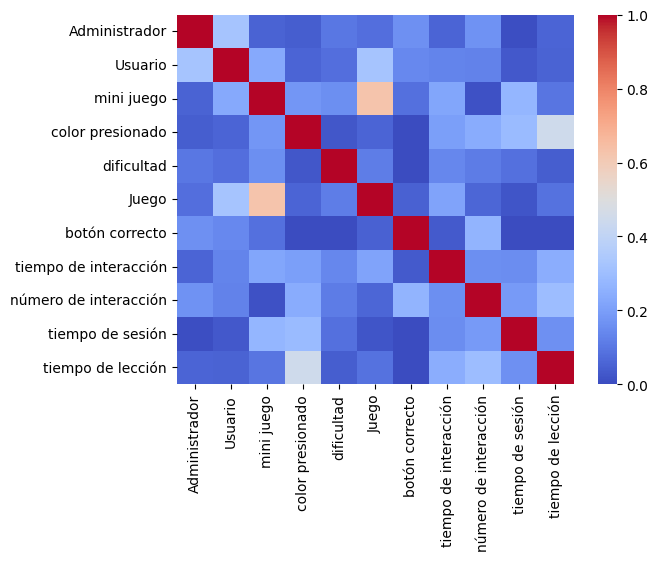

In [39]:
heat_map = sns.heatmap(corr_factors1, cmap = 'coolwarm')
heat_map

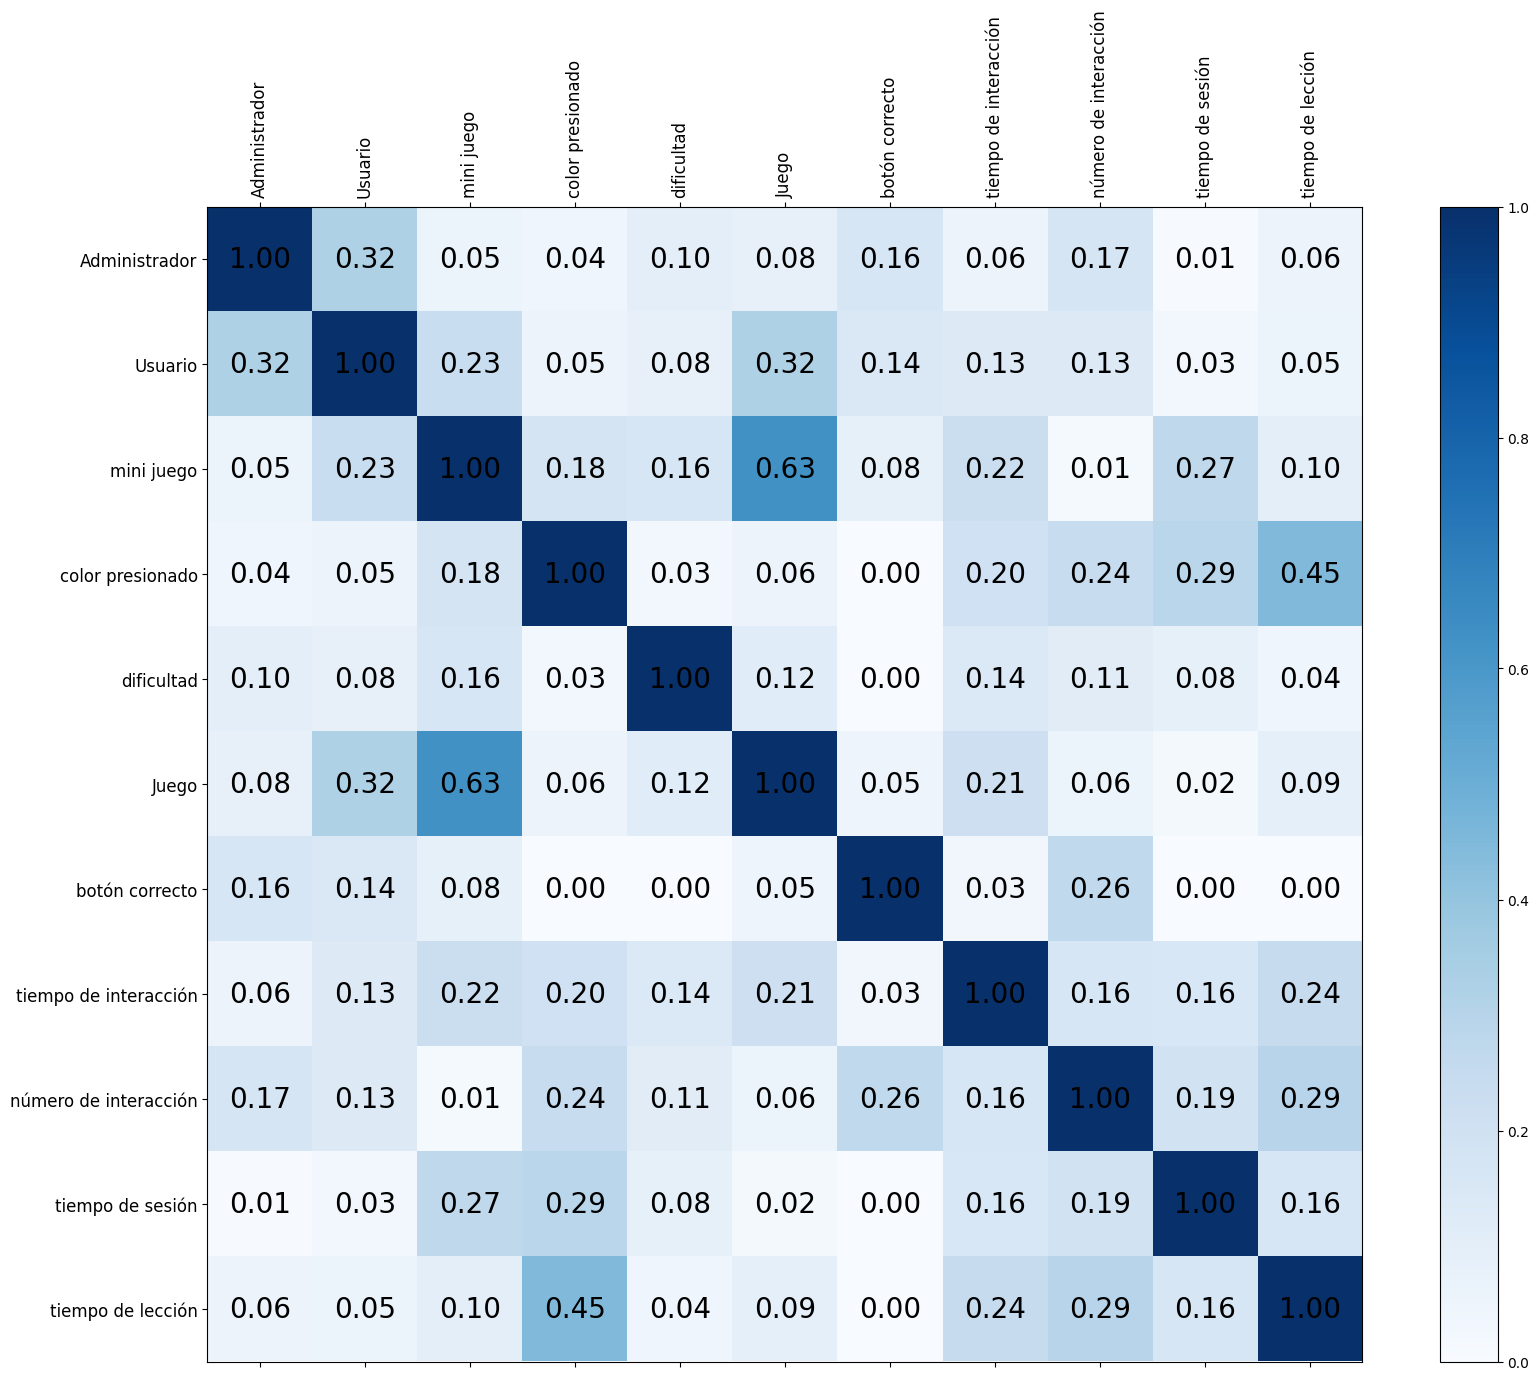

In [40]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_factors1, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors1.shape[0]):
    for j in range(corr_factors1.shape[1]):
        ax.text(j, i, f"{corr_factors1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors1.columns)), corr_factors1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors1.index)), corr_factors1.index, fontsize=12)
plt.savefig('General.png', dpi=300, bbox_inches='tight')
plt.show()

## Modelo no linear 

In [41]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    data_final[col] = pd.to_numeric(data_final[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

In [42]:
data_final.dtypes

Administrador              int64
Usuario                    int64
mini juego                 int64
color presionado           int64
dificultad                 int64
Juego                      int64
botón correcto           float64
tiempo de interacción    float64
número de interacción    float64
tiempo de sesión         float64
tiempo de lección        float64
dtype: object

In [43]:
Vars_Indep= data_final[['mini juego']]
Var_Dep= data_final['Juego']

In [44]:
x = Vars_Indep
y = Var_Dep

In [45]:
def func1(x, a, b, c):
    return a*np.exp(-b*x) + c

In [46]:
parametros, covs= curve_fit(func1, data_final['mini juego'], data_final['Juego'])
parametros

array([-1.47604534,  0.21798844,  2.03977323])

In [47]:
y_pred = func1(x, *parametros)
y_pred

,mini juego
0,1.832254
1,1.832254
2,1.832254
3,1.832254
4,1.832254
...,...
5860,1.872900
5861,0.852834
5862,0.852834
5863,1.872900


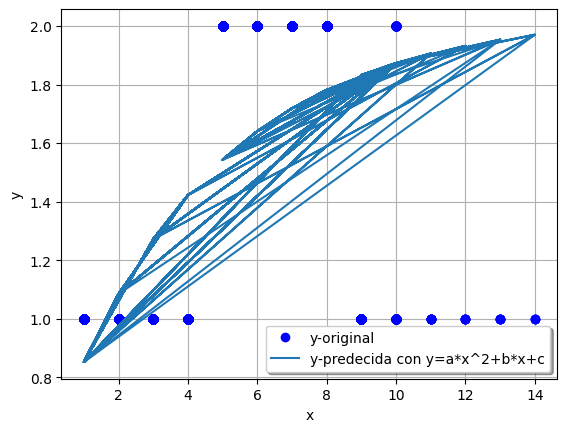

In [48]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida con y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [49]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

0.4584550639594618
0.6770930984432361


## Filtrado por usuarios

**Benjamín**

In [50]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    usuario1[col] = pd.to_numeric(usuario1[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/2193346210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario1[col] = pd.to_numeric(usuario1[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN


In [51]:
corr_factorsu1 = usuario1.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu1

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.264407,0.084592,0.016692,0.096144,0.208386,0.871506,0.027196
color presionado,0.264407,1.000000,-0.332598,-0.142168,0.302118,0.490704,0.344148,0.506580
dificultad,0.084592,-0.332598,1.000000,0.041072,0.036646,0.116633,0.304446,0.013318
botón correcto,0.016692,-0.142168,0.041072,1.000000,-0.071754,0.159280,0.035281,0.051934
tiempo de interacción,0.096144,0.302118,0.036646,-0.071754,1.000000,0.330938,0.081117,0.119402
número de interacción,0.208386,0.490704,0.116633,0.159280,0.330938,1.000000,0.348090,0.512384
tiempo de sesión,0.871506,0.344148,0.304446,0.035281,0.081117,0.348090,1.000000,0.085109
tiempo de lección,0.027196,0.506580,0.013318,0.051934,0.119402,0.512384,0.085109,1.000000


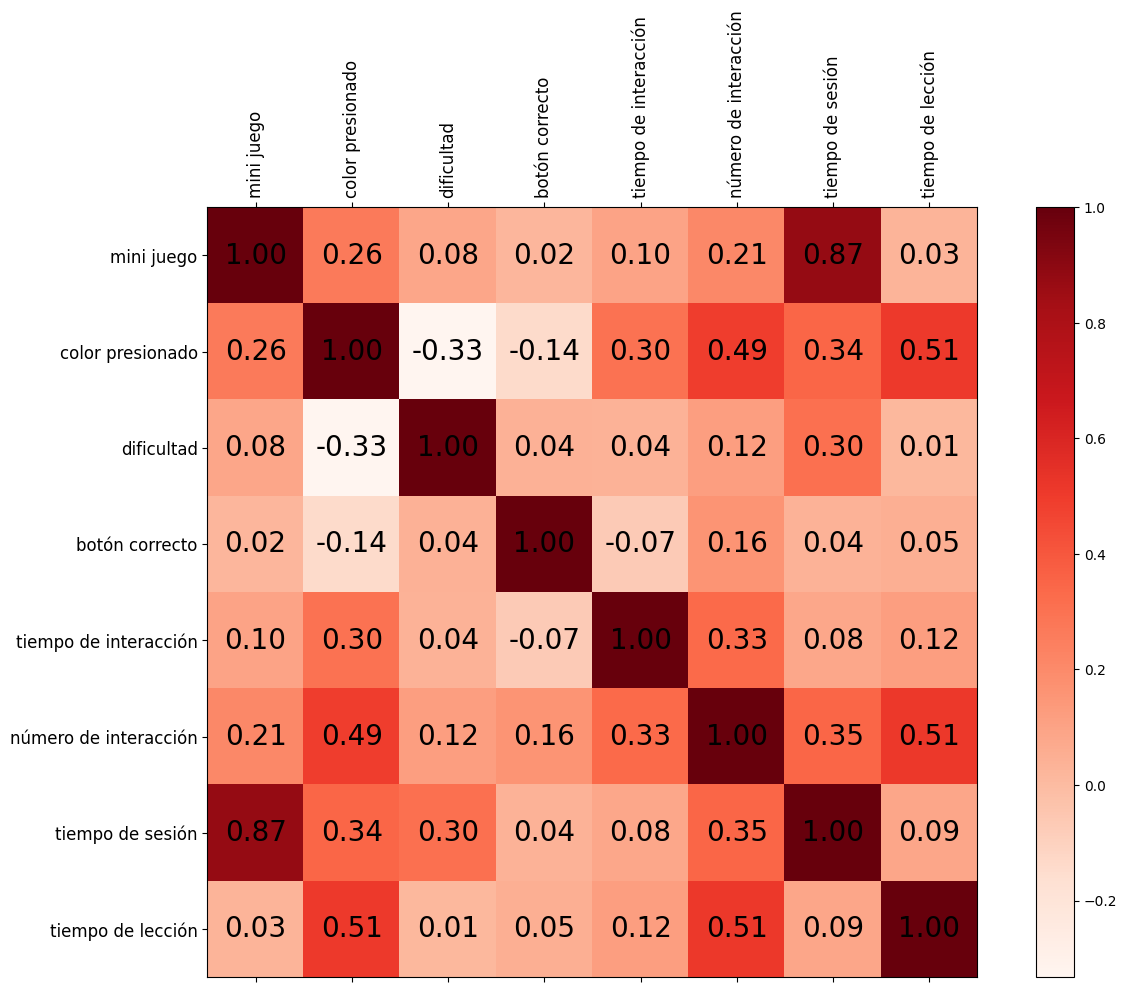

In [52]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu1, cmap="Reds")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu1.shape[0]):
    for j in range(corr_factorsu1.shape[1]):
        ax.text(j, i, f"{corr_factorsu1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu1.columns)), corr_factorsu1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu1.index)), corr_factorsu1.index, fontsize=12)
plt.savefig('Usuario1.png', dpi=300, bbox_inches='tight')
plt.show()

**Tiempo interacción**

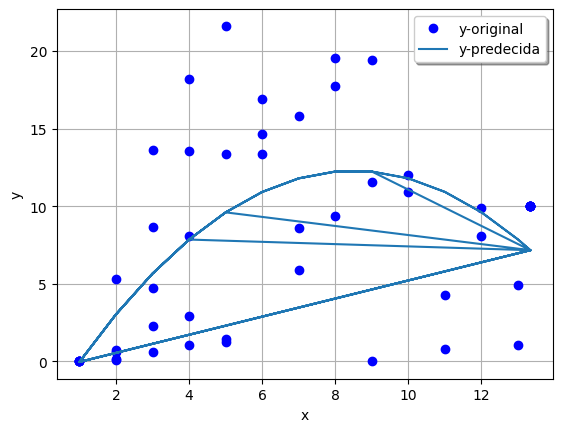

0.3507234285408657
0.5922190714092764


In [53]:
Vars_Indep= usuario1[['número de interacción']]
Var_Dep= usuario1['tiempo de interacción']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario1['número de interacción'], usuario1['tiempo de interacción'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

**Botón correcto**

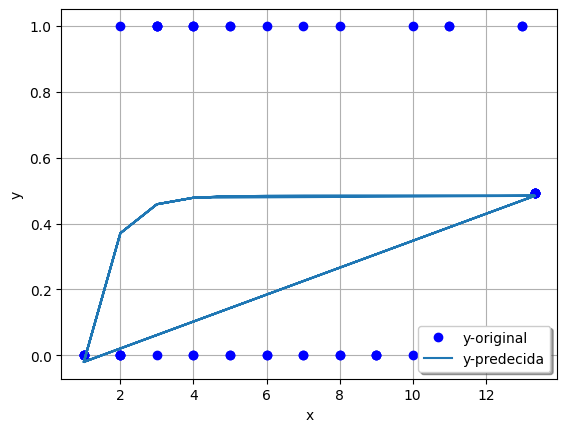

0.10592256162904456
0.3254574651610323


In [54]:
Vars_Indep= usuario1[['número de interacción']]
Var_Dep= usuario1['botón correcto']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.exp(-b*x) + c 

parametros, covs= curve_fit(func1, usuario1['número de interacción'], usuario1['botón correcto'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

**Color presionado**

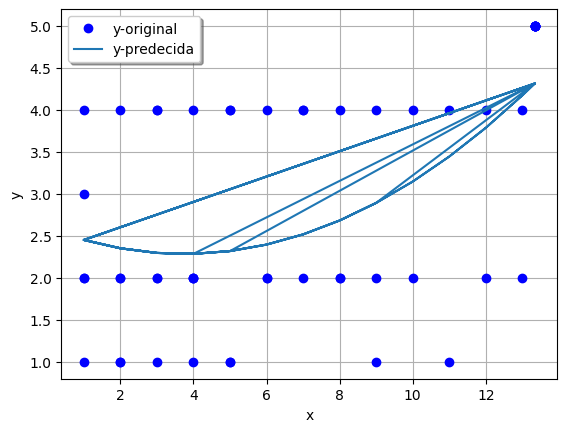

0.2919111633767236
0.5402880374177497


In [55]:
Vars_Indep= usuario1[['número de interacción']]
Var_Dep= usuario1['color presionado']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario1['número de interacción'], usuario1['color presionado'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

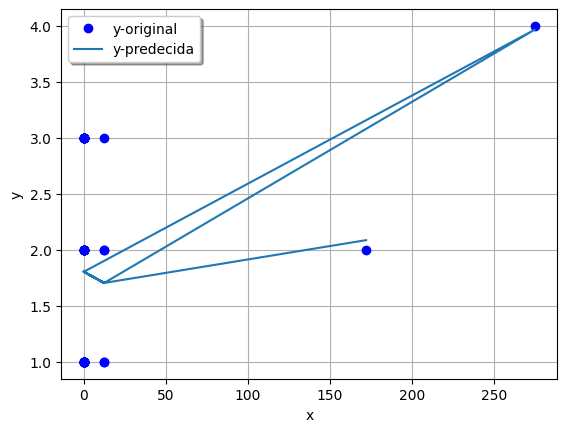

0.11604764837810011
0.34065767036439987


In [56]:
Vars_Indep= usuario1[['tiempo de sesión']]
Var_Dep= usuario1['dificultad']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario1['tiempo de sesión'], usuario1['dificultad'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Carlos Abel

In [57]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    usuario2[col] = pd.to_numeric(usuario2[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/2269753678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario2[col] = pd.to_numeric(usuario2[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN


In [58]:
corr_factorsu2 = usuario2.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu2

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.269857,-0.199480,0.343419,-0.264531,0.034378,0.118272,-0.126624
color presionado,0.269857,1.000000,0.285150,0.105796,-0.063193,0.247529,0.624962,0.412690
dificultad,-0.199480,0.285150,1.000000,-0.245701,0.286715,0.058236,0.011441,0.199201
botón correcto,0.343419,0.105796,-0.245701,1.000000,-0.534316,-0.162048,-0.039605,-0.026153
tiempo de interacción,-0.264531,-0.063193,0.286715,-0.534316,1.000000,0.495046,0.204574,0.135089
número de interacción,0.034378,0.247529,0.058236,-0.162048,0.495046,1.000000,0.764405,0.504770
tiempo de sesión,0.118272,0.624962,0.011441,-0.039605,0.204574,0.764405,1.000000,0.665438
tiempo de lección,-0.126624,0.412690,0.199201,-0.026153,0.135089,0.504770,0.665438,1.000000


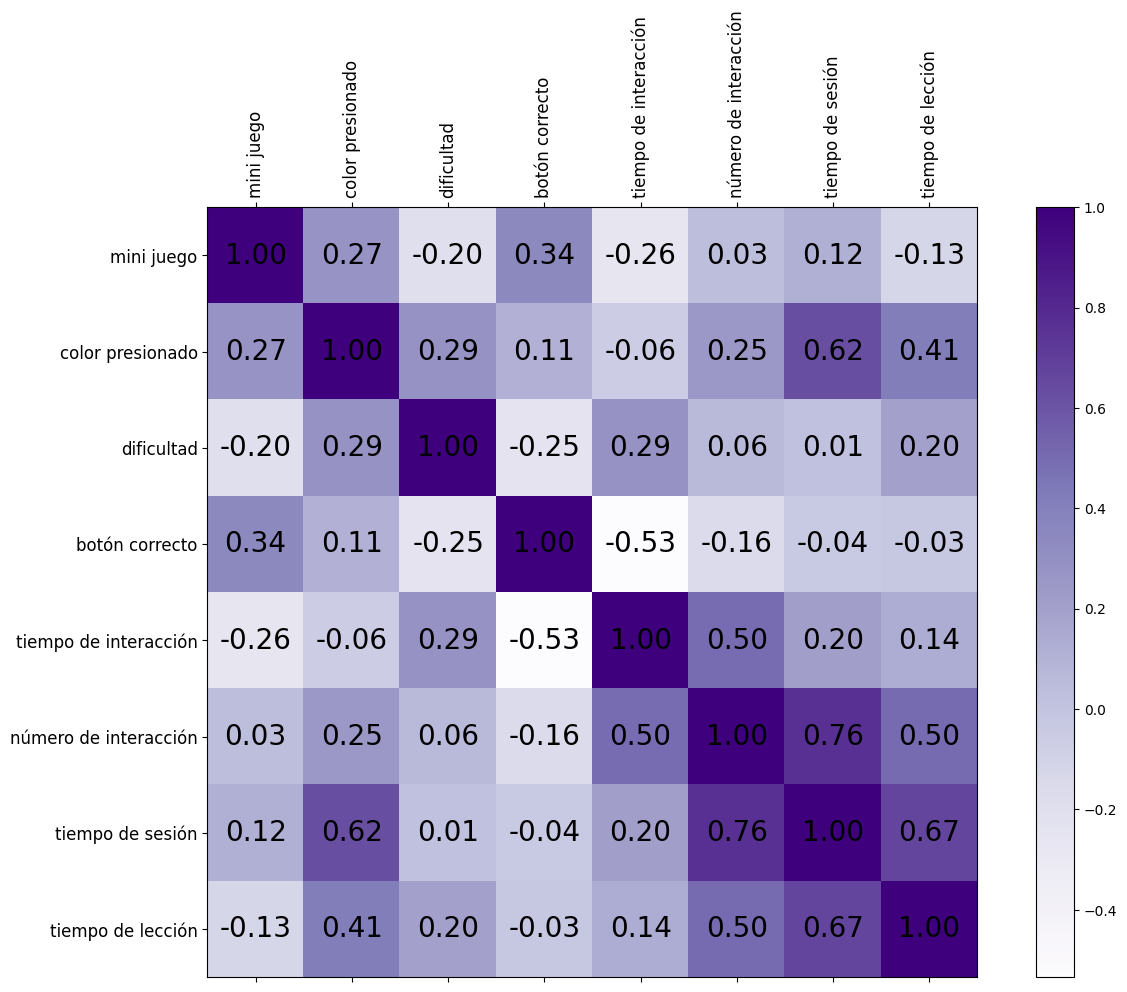

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu2, cmap="Purples")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu2.shape[0]):
    for j in range(corr_factorsu2.shape[1]):
        ax.text(j, i, f"{corr_factorsu2.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu2.columns)), corr_factorsu2.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu2.index)), corr_factorsu2.index, fontsize=12)
plt.savefig('Usuario2.png', dpi=300, bbox_inches='tight')
plt.show()

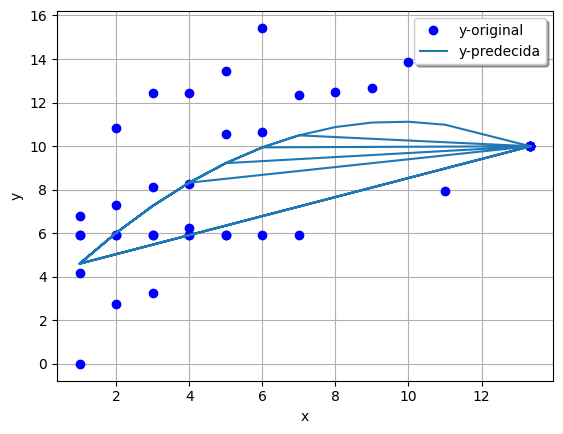

0.3745184430981895
0.6119791198220651


In [60]:
Vars_Indep= usuario2[['número de interacción']]
Var_Dep= usuario2['tiempo de interacción']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario2['número de interacción'], usuario2['tiempo de interacción'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

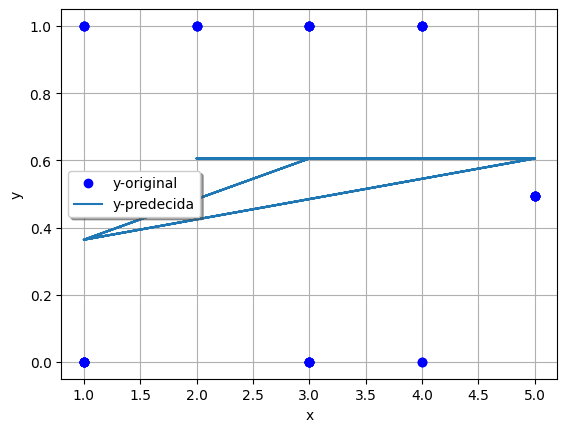

0.056378019288319314
0.2374405594845146


In [61]:
Vars_Indep= usuario2[['color presionado']]
Var_Dep= usuario2['botón correcto']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.exp(-b*x) + c

parametros, covs= curve_fit(func1, usuario2['color presionado'], usuario2['botón correcto'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

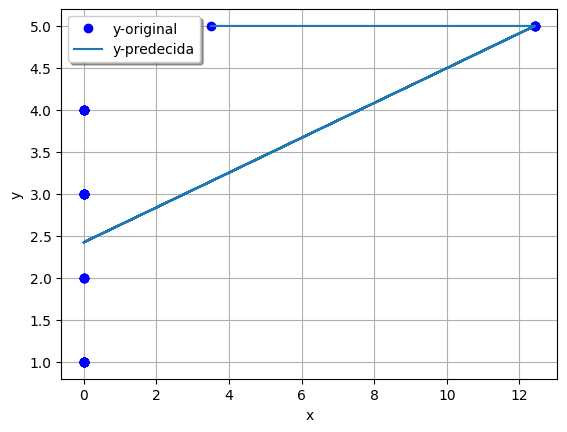

0.4332573758695134
0.658222892240549


In [62]:
Vars_Indep= usuario2[['tiempo de sesión']]
Var_Dep= usuario2['color presionado']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, usuario2['tiempo de sesión'], usuario2['color presionado'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

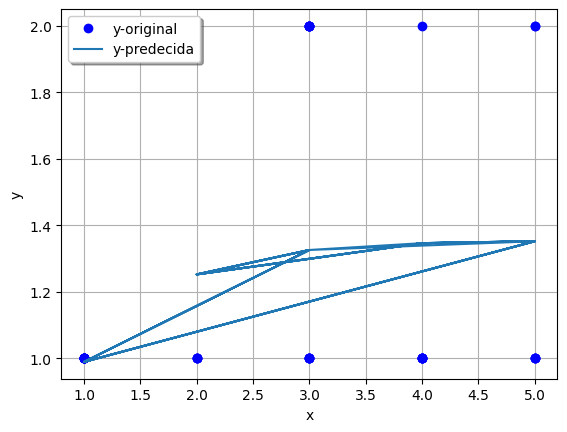

0.13386752593611562
0.36587911382875576


In [63]:
Vars_Indep= usuario2[['color presionado']]
Var_Dep= usuario2['dificultad']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.exp(-b*x) + c

parametros, covs= curve_fit(func1, usuario2['color presionado'], usuario2['dificultad'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Carlos Enrique

In [64]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    usuario3[col] = pd.to_numeric(usuario3[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/4199124887.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario3[col] = pd.to_numeric(usuario3[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN


In [65]:
corr_factorsu3 = usuario3.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu3

,mini juego,color presionado,dificultad,Juego,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.232068,-0.213251,0.552449,-0.164220,0.352716,0.219022,0.446203,0.087864
color presionado,0.232068,1.000000,0.027340,-0.023885,-0.388219,0.692734,0.680219,0.432332,0.547172
dificultad,-0.213251,0.027340,1.000000,-0.373234,-0.129152,0.004346,0.168000,0.208400,-0.039765
Juego,0.552449,-0.023885,-0.373234,1.000000,0.025179,0.057630,-0.089111,-0.137918,0.097316
botón correcto,-0.164220,-0.388219,-0.129152,0.025179,1.000000,-0.504341,-0.574101,-0.342351,-0.433290
tiempo de interacción,0.352716,0.692734,0.004346,0.057630,-0.504341,1.000000,0.797318,0.526918,0.666882
número de interacción,0.219022,0.680219,0.168000,-0.089111,-0.574101,0.797318,1.000000,0.543545,0.687926
tiempo de sesión,0.446203,0.432332,0.208400,-0.137918,-0.342351,0.526918,0.543545,1.000000,0.196713
tiempo de lección,0.087864,0.547172,-0.039765,0.097316,-0.433290,0.666882,0.687926,0.196713,1.000000


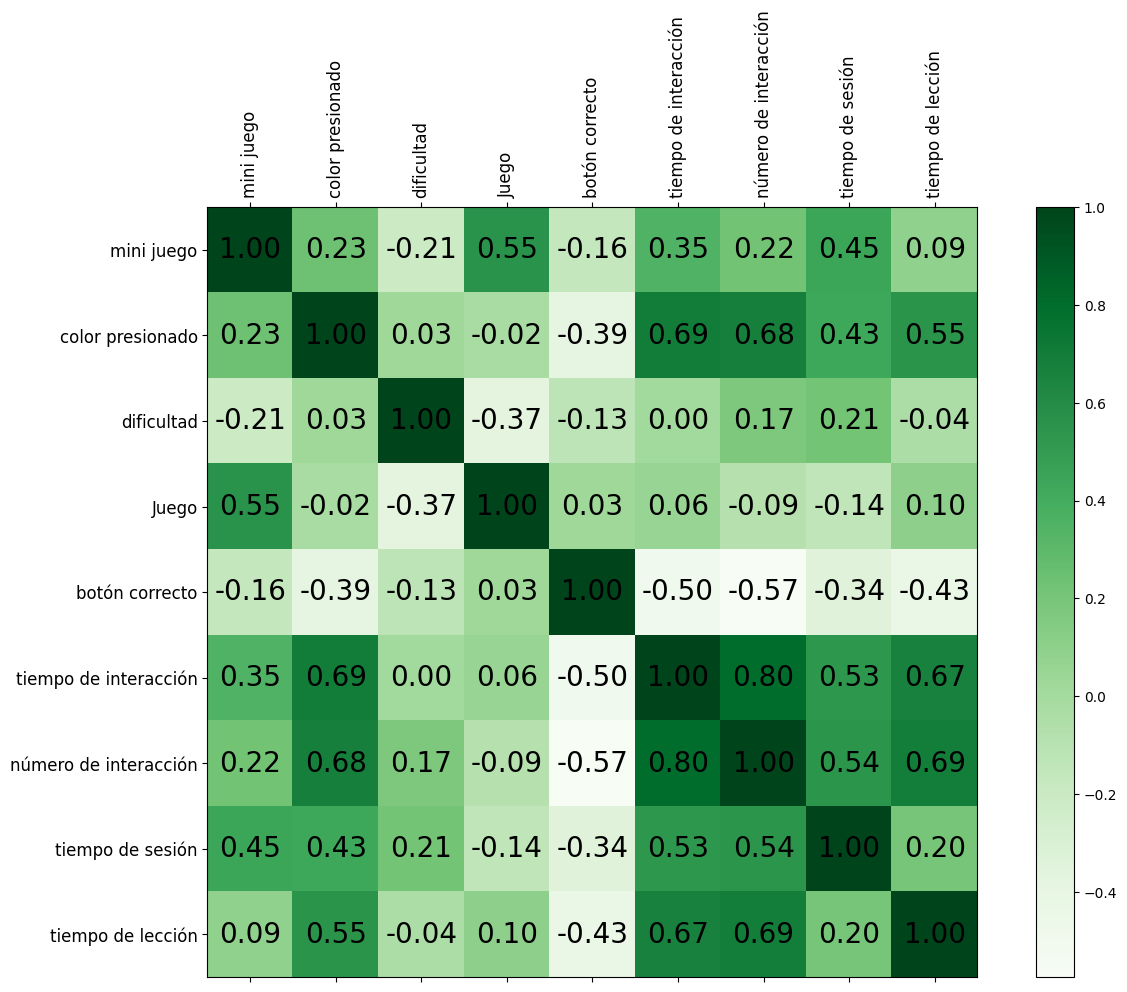

In [66]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu3, cmap="Greens")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu3.shape[0]):
    for j in range(corr_factorsu3.shape[1]):
        ax.text(j, i, f"{corr_factorsu3.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu3.columns)), corr_factorsu3.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu3.index)), corr_factorsu3.index, fontsize=12)
plt.savefig('Usuario3.png', dpi=300, bbox_inches='tight')
plt.show()

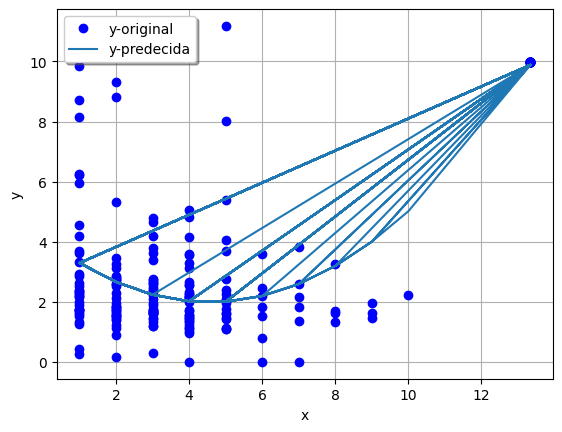

0.7914385161184914
0.8896283022243006


In [67]:
Vars_Indep= usuario3[['número de interacción']]
Var_Dep= usuario3['tiempo de interacción']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario3['número de interacción'], usuario3['tiempo de interacción'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

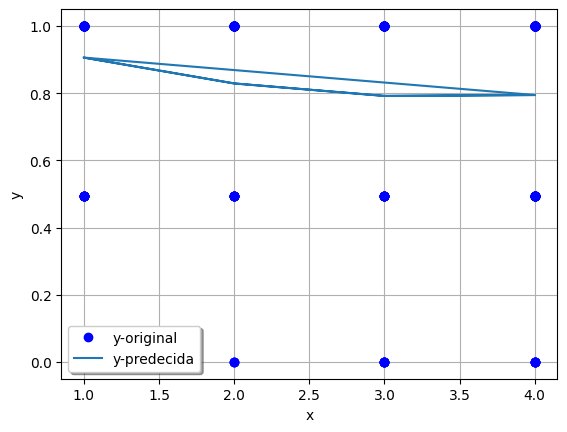

0.02069849900697296
0.14386972929345826


In [68]:
Vars_Indep= usuario3[['dificultad']]
Var_Dep= usuario3['botón correcto']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario3['dificultad'], usuario3['botón correcto'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

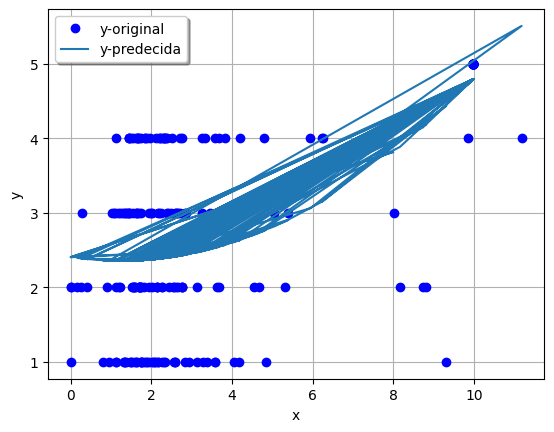

0.49953212002779657
0.7067758626522248


In [69]:
Vars_Indep= usuario3[['tiempo de interacción']]
Var_Dep= usuario3['color presionado']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, usuario3['tiempo de interacción'], usuario3['color presionado'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

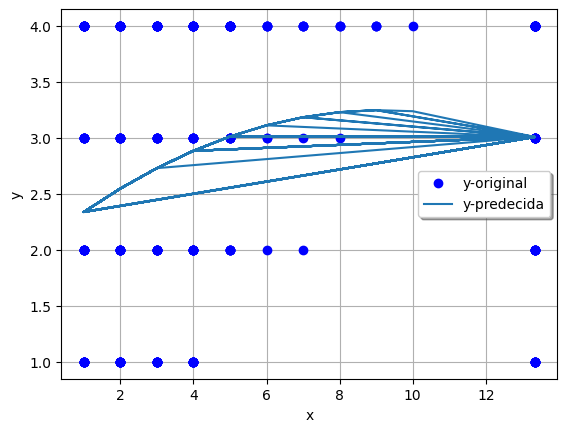

0.05280992529240813
0.2298041019921275


In [70]:
Vars_Indep= usuario3[['número de interacción']]
Var_Dep= usuario3['dificultad']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario3['número de interacción'], usuario3['dificultad'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

**Concepción**

In [71]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    usuario4[col] = pd.to_numeric(usuario4[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/2126378672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario4[col] = pd.to_numeric(usuario4[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN


In [72]:
corr_factorsu4 = usuario4.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu4

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.107384,-0.123527,0.190297,-0.042083,0.066579,0.068389,0.054928
color presionado,0.107384,1.000000,0.040072,-0.063424,0.141389,0.519727,0.633043,0.536363
dificultad,-0.123527,0.040072,1.000000,-0.060697,-0.008613,0.036589,0.037100,-0.121309
botón correcto,0.190297,-0.063424,-0.060697,1.000000,0.105632,-0.251508,-0.129210,-0.109477
tiempo de interacción,-0.042083,0.141389,-0.008613,0.105632,1.000000,0.085043,0.129179,0.109451
número de interacción,0.066579,0.519727,0.036589,-0.251508,0.085043,1.000000,0.817620,0.692750
tiempo de sesión,0.068389,0.633043,0.037100,-0.129210,0.129179,0.817620,1.000000,0.864881
tiempo de lección,0.054928,0.536363,-0.121309,-0.109477,0.109451,0.692750,0.864881,1.000000


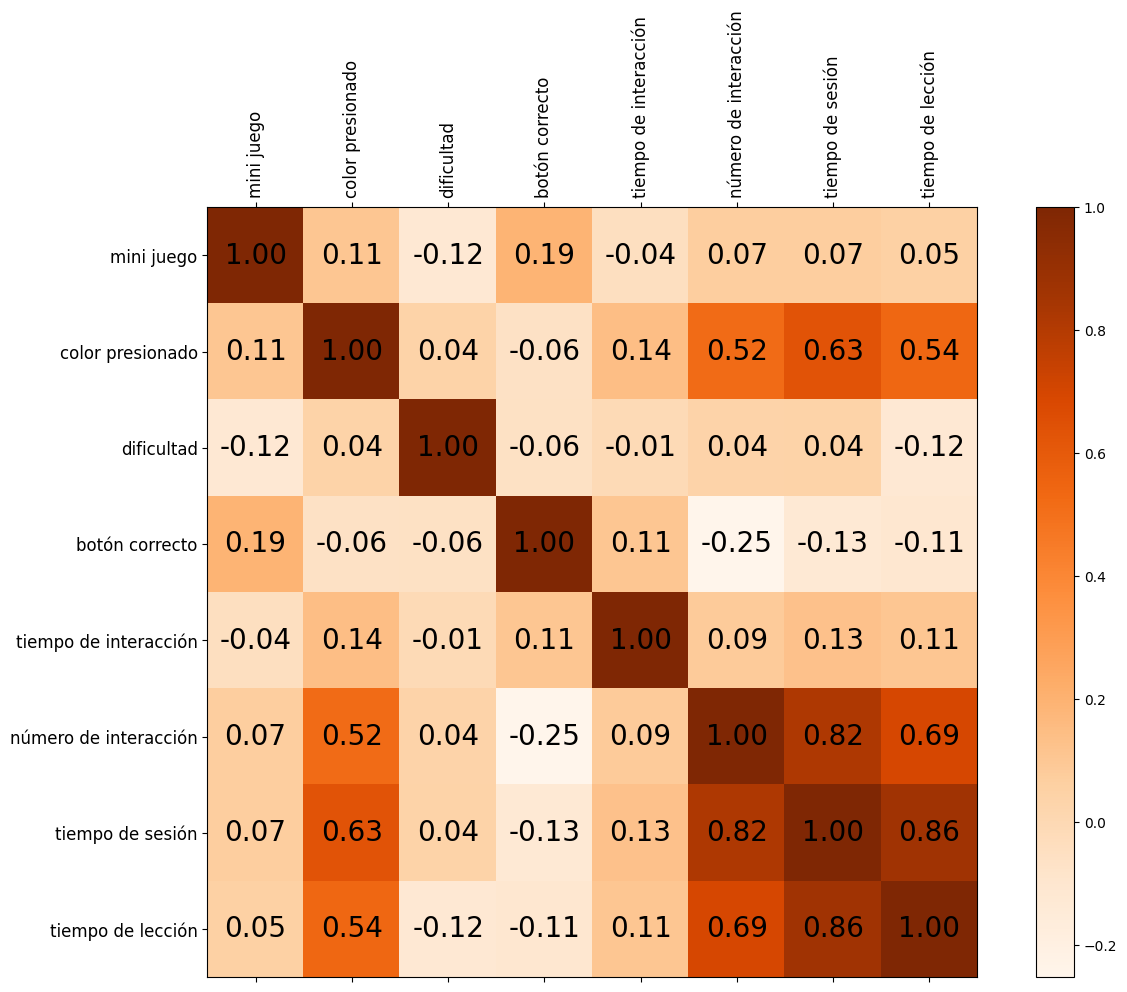

In [73]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu4, cmap="Oranges")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu4.shape[0]):
    for j in range(corr_factorsu4.shape[1]):
        ax.text(j, i, f"{corr_factorsu4.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu4.columns)), corr_factorsu4.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu4.index)), corr_factorsu4.index, fontsize=12)
plt.savefig('Usuario4.png', dpi=300, bbox_inches='tight')
plt.show()

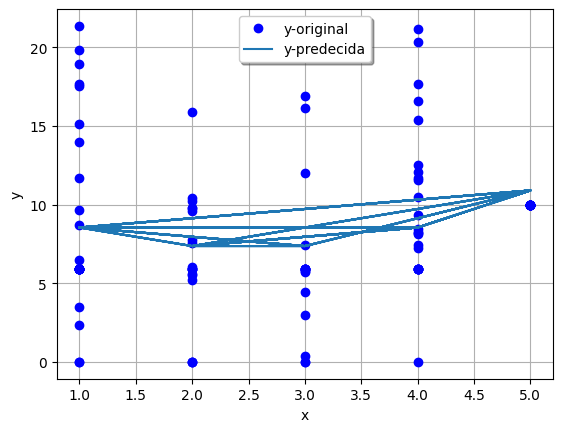

0.0590145536202511
0.2429291123357822


In [74]:
Vars_Indep= usuario4[['color presionado']]
Var_Dep= usuario4['tiempo de interacción']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, usuario4['color presionado'], usuario4['tiempo de interacción'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/2988680620.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, usuario4['mini juego'], usuario4['botón correcto'])


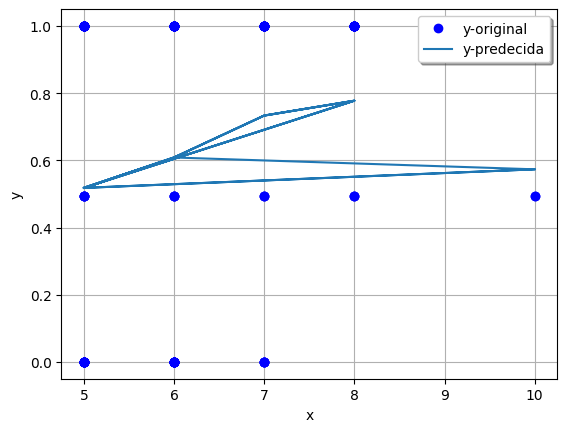

0.050732791505807784
0.22523940930886802


In [75]:
Vars_Indep= usuario4[['mini juego']]
Var_Dep= usuario4['botón correcto']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.sin(x) + b

parametros, covs= curve_fit(func1, usuario4['mini juego'], usuario4['botón correcto'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

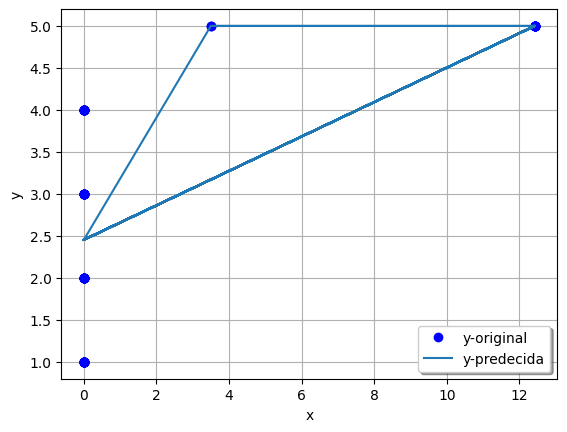

0.4314098466826388
0.6568179707366714


In [76]:
Vars_Indep= usuario4[['tiempo de sesión']]
Var_Dep= usuario4['color presionado']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, usuario4['tiempo de sesión'], usuario4['color presionado'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

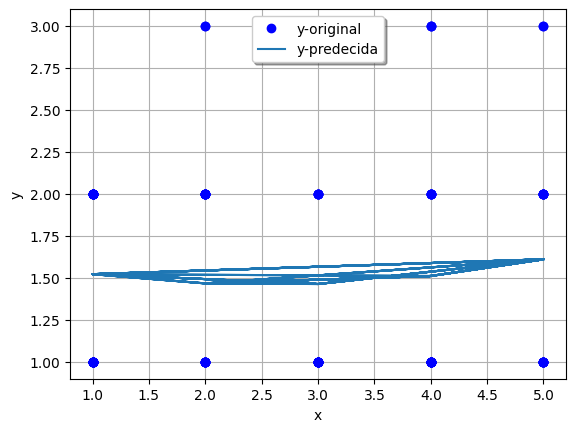

0.006169636613060914
0.07854703440016633


In [77]:
Vars_Indep= usuario4[['color presionado']]
Var_Dep= usuario4['dificultad']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, usuario4['color presionado'], usuario4['dificultad'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

**Denisse**

In [78]:
columnas_categoricas = ['Administrador', 'Usuario', 'mini juego', 'color presionado', 'dificultad', 'Juego']
for col in columnas_categoricas:
    usuario5[col] = pd.to_numeric(usuario5[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_29531/1767420050.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usuario5[col] = pd.to_numeric(usuario5[col], errors='coerce')  # 'coerce' maneja valores no convertibles como NaN


In [79]:
corr_factorsu5 = usuario5.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factorsu5

,mini juego,color presionado,dificultad,botón correcto,tiempo de interacción,número de interacción,tiempo de sesión,tiempo de lección
mini juego,1.000000,0.250775,-0.238490,0.062034,0.219065,0.013403,0.390721,0.159457
color presionado,0.250775,1.000000,-0.060264,-0.055944,0.397843,0.268965,0.445978,0.474711
dificultad,-0.238490,-0.060264,1.000000,0.072202,-0.158132,0.067359,0.163443,-0.052085
botón correcto,0.062034,-0.055944,0.072202,1.000000,-0.222831,-0.211453,-0.054230,-0.057724
tiempo de interacción,0.219065,0.397843,-0.158132,-0.222831,1.000000,0.462129,0.461092,0.490798
número de interacción,0.013403,0.268965,0.067359,-0.211453,0.462129,1.000000,0.328358,0.349513
tiempo de sesión,0.390721,0.445978,0.163443,-0.054230,0.461092,0.328358,1.000000,0.386284
tiempo de lección,0.159457,0.474711,-0.052085,-0.057724,0.490798,0.349513,0.386284,1.000000


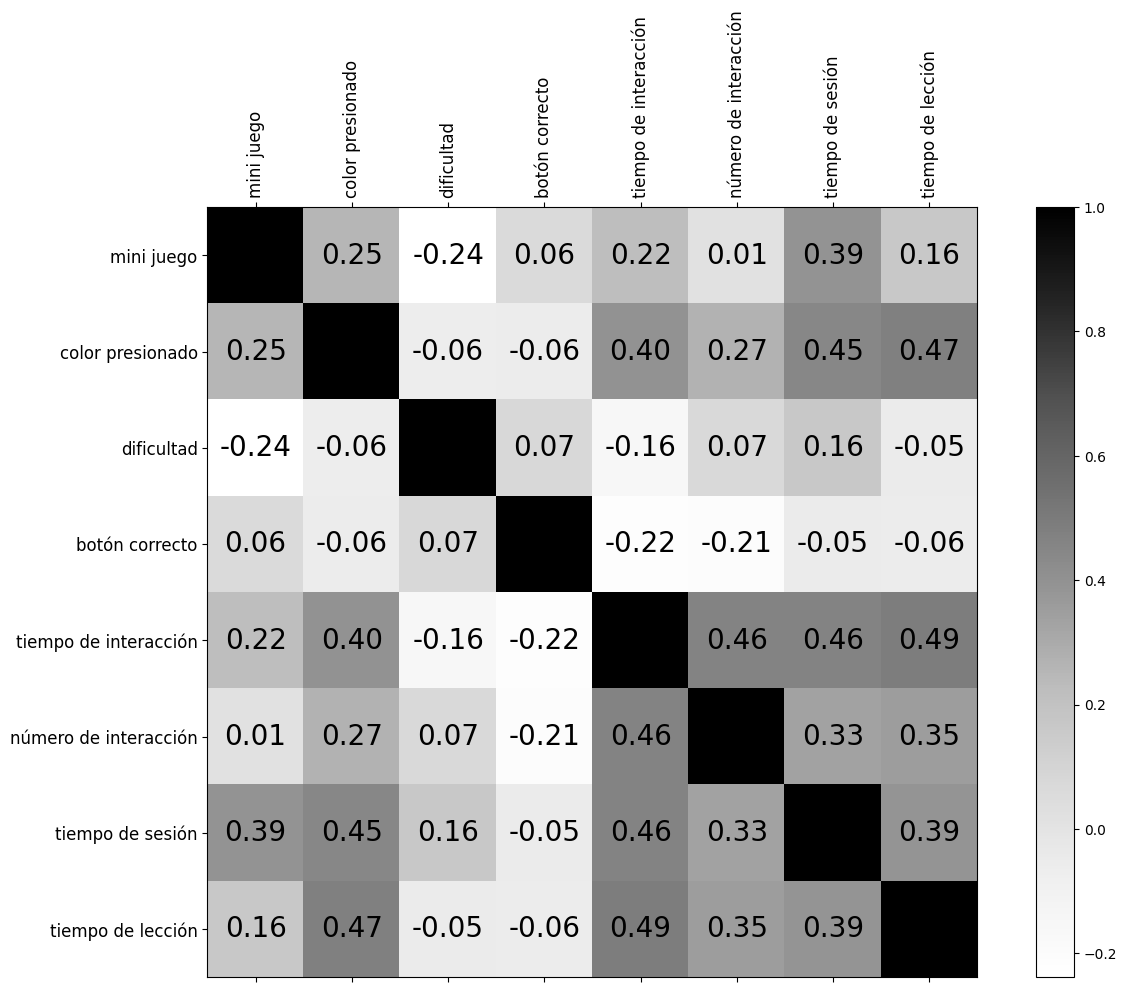

In [80]:
fig, ax = plt.subplots(figsize=(15, 10))
cax = ax.matshow(corr_factorsu5, cmap="Greys")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factorsu5.shape[0]):
    for j in range(corr_factorsu5.shape[1]):
        ax.text(j, i, f"{corr_factorsu5.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factorsu5.columns)), corr_factorsu5.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factorsu5.index)), corr_factorsu5.index, fontsize=12)
plt.savefig('Usuario5.png', dpi=300, bbox_inches='tight')
plt.show()

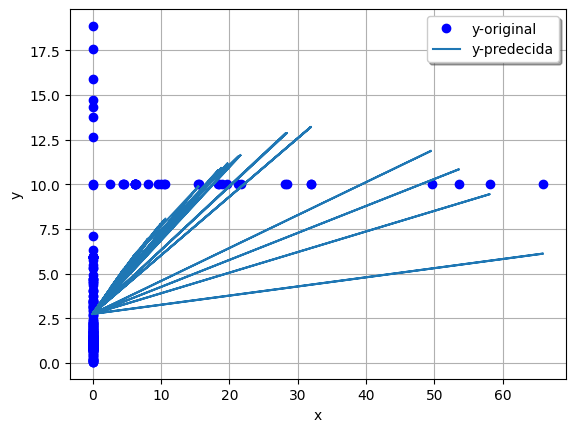

0.365345364608227
0.6044380568827769


In [81]:
Vars_Indep= usuario5[['tiempo de lección']]
Var_Dep= usuario5['tiempo de interacción']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c   

parametros, covs= curve_fit(func1, usuario5['tiempo de lección'], usuario5['tiempo de interacción'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

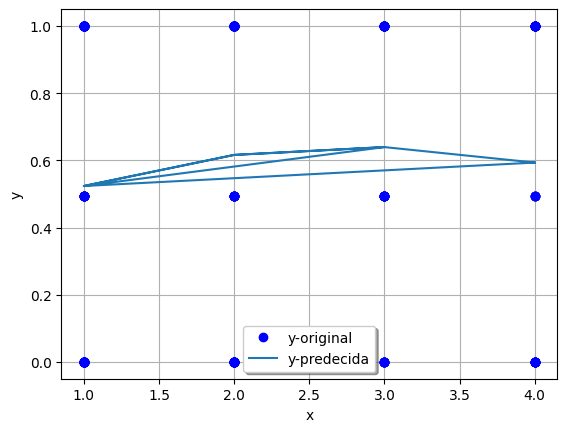

0.010605214918802952
0.1029816241802534


In [82]:
Vars_Indep= usuario5[['dificultad']]
Var_Dep= usuario5['botón correcto']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c   

parametros, covs= curve_fit(func1, usuario5['dificultad'], usuario5['botón correcto'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

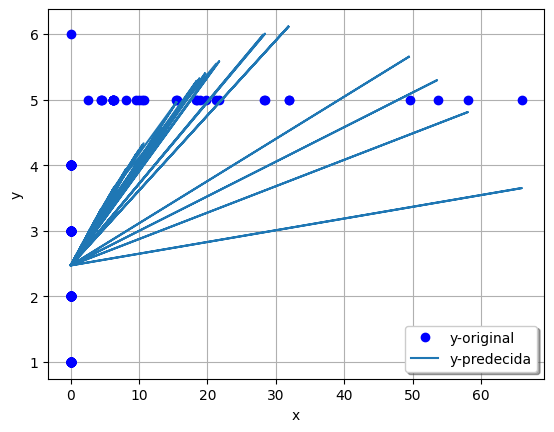

0.3417872313777437
0.5846257190525779


In [83]:
Vars_Indep= usuario5[['tiempo de lección']]
Var_Dep= usuario5['color presionado']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c   

parametros, covs= curve_fit(func1, usuario5['tiempo de lección'], usuario5['color presionado'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

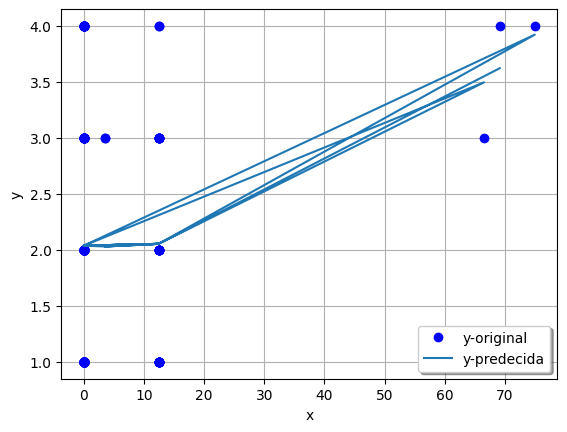

0.03291481660929607
0.18142441018037256


In [84]:
Vars_Indep= usuario5[['tiempo de sesión']]
Var_Dep= usuario5['dificultad']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c  

parametros, covs= curve_fit(func1, usuario5['tiempo de sesión'], usuario5['dificultad'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)